In [72]:
# K-Means

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [73]:
#load dataset
irisDataset = pd.read_csv("D:/Kuliah Online/Coding & Machine Learning/12th Meet (Wednesday, May, 25th 2022)/Practice/Data/iris.csv", sep=',', skiprows=0)
irisDataset

,Id,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [74]:
#Deleting Target Class
irisDataset.drop('Species', inplace=True, axis=1)
irisDataset.drop('Id', inplace=True, axis=1)
irisDataset

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


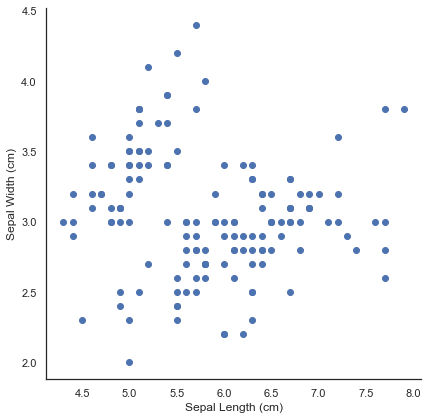

In [75]:
#Visualisasi Data
sns.set(style="white", color_codes=True)
sns.FacetGrid(irisDataset, height=6).map(plt.scatter, "Sepal Length (cm)", "Sepal Width (cm)").add_legend()

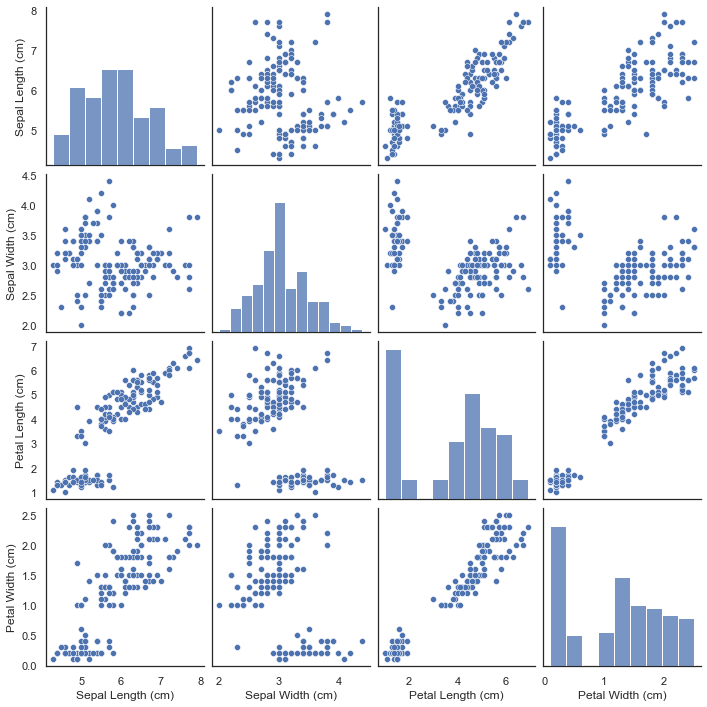

In [76]:
sns.pairplot(irisDataset)

In [77]:
#Mengubah ke dalam bentuk array
X = irisDataset.iloc[:, 0:5].values
print("Atribut Dataset :")
print(X)

Atribut Dataset :
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5

In [78]:
#Splitting data training dan data testing
X_train, X_test = train_test_split(X, test_size=0.1, random_state=42)
print("Data Training : ")
print(X_train)
print(len(X_train))
print("Data Testing : ")
print(X_test)
print(len(X_test))

Data Training : 
[[6.3 3.3 4.7 1.6]
 [6.5 3.  5.8 2.2]
 [5.6 2.5 3.9 1.1]
 [5.7 2.8 4.5 1.3]
 [6.4 2.8 5.6 2.2]
 [4.7 3.2 1.6 0.2]
 [6.1 3.  4.9 1.8]
 [5.  3.4 1.6 0.4]
 [6.4 2.8 5.6 2.1]
 [7.9 3.8 6.4 2. ]
 [6.7 3.  5.2 2.3]
 [6.7 2.5 5.8 1.8]
 [6.8 3.2 5.9 2.3]
 [4.8 3.  1.4 0.3]
 [4.8 3.1 1.6 0.2]
 [4.6 3.6 1.  0.2]
 [5.7 4.4 1.5 0.4]
 [6.7 3.1 4.4 1.4]
 [4.8 3.4 1.6 0.2]
 [4.4 3.2 1.3 0.2]
 [6.3 2.5 5.  1.9]
 [6.4 3.2 4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.2 4.1 1.5 0.1]
 [5.8 2.7 5.1 1.9]
 [6.  3.4 4.5 1.6]
 [6.7 3.1 4.7 1.5]
 [5.4 3.9 1.3 0.4]
 [5.4 3.7 1.5 0.2]
 [5.5 2.4 3.7 1. ]
 [6.3 2.8 5.1 1.5]
 [6.4 3.1 5.5 1.8]
 [6.6 3.  4.4 1.4]
 [7.2 3.6 6.1 2.5]
 [5.7 2.9 4.2 1.3]
 [7.6 3.  6.6 2.1]
 [5.6 3.  4.5 1.5]
 [5.1 3.5 1.4 0.2]
 [7.7 2.8 6.7 2. ]
 [5.8 2.7 4.1 1. ]
 [5.2 3.4 1.4 0.2]
 [5.  3.5 1.3 0.3]
 [5.1 3.8 1.9 0.4]
 [5.  2.  3.5 1. ]
 [6.3 2.7 4.9 1.8]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.1 3.3 1.7 0.5]
 [5.6 2.7 4.2 1.3]
 [5.1 3.4 1.5 0.2]
 [5.7 3.  4.2 

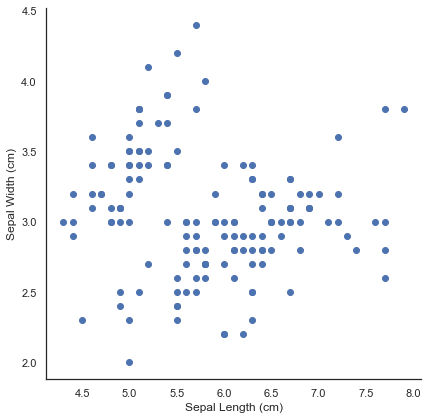

In [79]:
#Visualisasi Data
sns.set(style="white", color_codes=True)
sns.FacetGrid(irisDataset, height=6).map(plt.scatter, "Sepal Length (cm)", "Sepal Width (cm)").add_legend()

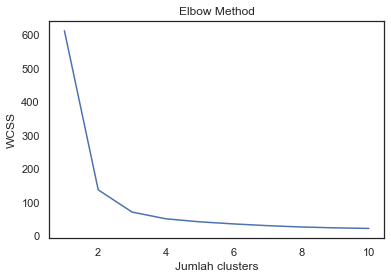

In [80]:
#Membuat Elbow Method
wcss = [] #Within-CLuster sum of square

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Jumlah clusters')
plt.ylabel('WCSS')
plt.show()

In [81]:
#Proses training dan pembentukan model

kmeans = KMeans(n_clusters=3, random_state=0).fit(X_train)
print("Proses Training Model KMeans Sudah Selesai!")

Proses Training Model KMeans Sudah Selesai!


In [82]:
# Hasil Clustering Data Training
print('Hasil Clustering Data Latih')
print(kmeans.labels_)

Hasil Clustering Data Latih
[2 0 2 2 0 1 2 1 0 0 0 0 0 1 1 1 1 2 1 1 2 2 1 1 1 2 2 2 1 1 2 2 0 2 0 2 0
 2 1 0 2 1 1 1 2 2 1 1 1 2 1 2 0 1 2 2 1 2 2 2 2 0 2 1 2 0 1 1 2 0 1 2 1 1
 2 2 0 2 0 0 2 1 1 2 0 1 1 1 2 0 1 0 0 1 2 2 2 0 0 1 0 2 0 2 2 2 1 2 2 1 2
 0 0 1 2 0 0 1 0 1 0 0 0 2 0 2 2 2 2 1 2 2 1 2 0]


In [83]:
# Prediksi Data Latih
print('Hasil Clustering Data Uji')
print(kmeans.predict(X_test))

Hasil Clustering Data Uji
[2 1 0 2 2 1 2 0 2 2 0 1 1 1 1]


In [84]:
# Hasil Centroid
print('Hasil Centroid Setiap Cluster')
print(kmeans.cluster_centers_)

Hasil Centroid Setiap Cluster
[[6.83888889 3.08611111 5.71666667 2.04166667]
 [4.975      3.41590909 1.46136364 0.24545455]
 [5.86181818 2.74363636 4.39454545 1.44363636]]


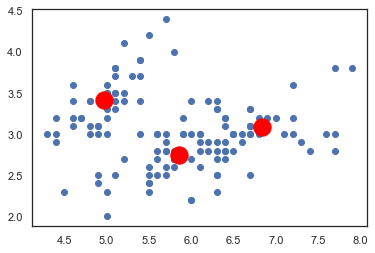

In [88]:
# Plotting Centroid
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X_train)
plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='red')
plt.show()



In [92]:
# Preprocessing Sebelum Plotting
print('Ukuran Data Latih : ', X_train.shape)
print('Ukuran Hasil Data Latih : ', kmeans.labels_.shape)
print('Ukuran Data Uji : ', X_test.shape)
print('Ukuran Hasil Data Uji : ', kmeans.predict(X_test).shape)
print('Ukuran Hasil Clustering : ', kmeans.cluster_centers_.shape)
print()

print('Hasil Preprocessing Data Clusters : ')
Clusters = np.array([['Centroid 0'],
                     ['Centroid 1'],
                     ['Centroid 2']])

dataClusters = np.concatenate((kmeans.cluster_centers_, Clusters), axis=1, dtype=object)
print(dataClusters)
print(dataClusters.shape)
print()

print('Hasil Preprocessing Data Latih : ')
hasilLatih = np.reshape(kmeans.labels_, (135, 1))
dataLatih = np.concatenate((X_train, hasilLatih), axis=1, dtype=object)
dataLatih = np.concatenate((dataLatih, dataClusters), axis=0, dtype=object)
print(dataLatih)
print(dataLatih.shape)
print()

print('Hasil Preprocessing Data Uji')
hasilUji = np.reshape(kmeans.predict(X_test), (15,1))
dataUji = np.concatenate((X_test, hasilUji), axis=1, dtype=object)
dataUji = np.concatenate((dataUji, dataClusters), axis=0, dtype=object)
print(dataUji)
print(dataUji.shape)
print() 




Ukuran Data Latih :  (135, 4)
Ukuran Hasil Data Latih :  (135,)
Ukuran Data Uji :  (15, 4)
Ukuran Hasil Data Uji :  (15,)
Ukuran Hasil Clustering :  (3, 4)

Hasil Preprocessing Data Clusters : 
[[6.838888888888889 3.0861111111111112 5.716666666666667
  2.041666666666667 'Centroid 0']
 [4.975 3.415909090909091 1.461363636363636 0.24545454545454548
  'Centroid 1']
 [5.861818181818181 2.7436363636363637 4.3945454545454545
  1.4436363636363638 'Centroid 2']]
(3, 5)

Hasil Preprocessing Data Latih : 
[[6.3 3.3 4.7 1.6 2]
 [6.5 3.0 5.8 2.2 0]
 [5.6 2.5 3.9 1.1 2]
 [5.7 2.8 4.5 1.3 2]
 [6.4 2.8 5.6 2.2 0]
 [4.7 3.2 1.6 0.2 1]
 [6.1 3.0 4.9 1.8 2]
 [5.0 3.4 1.6 0.4 1]
 [6.4 2.8 5.6 2.1 0]
 [7.9 3.8 6.4 2.0 0]
 [6.7 3.0 5.2 2.3 0]
 [6.7 2.5 5.8 1.8 0]
 [6.8 3.2 5.9 2.3 0]
 [4.8 3.0 1.4 0.3 1]
 [4.8 3.1 1.6 0.2 1]
 [4.6 3.6 1.0 0.2 1]
 [5.7 4.4 1.5 0.4 1]
 [6.7 3.1 4.4 1.4 2]
 [4.8 3.4 1.6 0.2 1]
 [4.4 3.2 1.3 0.2 1]
 [6.3 2.5 5.0 1.9 2]
 [6.4 3.2 4.5 1.5 2]
 [5.2 3.5 1.5 0.2 1]
 [5.0 3.6 1.4 0.

In [93]:
# Mengubah ke Bentuk Data Frame
dataFrame = pd.DataFrame(dataLatih, columns = ['Sepal Length (cm)',
                                               'Sepal Width (cm)',
                                               'Petal Length (cm)',
                                               'Petal Width (cm)',
                                               'Cluster'])
dataFrame1 = pd.DataFrame(dataUji, columns = ['Sepal Length (cm)',
                                               'Sepal Width (cm)',
                                               'Petal Length (cm)',
                                               'Petal Width (cm)',
                                               'Cluster'])
dataFrame.head()


,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Cluster
0,6.3,3.3,4.7,1.6,2
1,6.5,3.0,5.8,2.2,0
2,5.6,2.5,3.9,1.1,2
3,5.7,2.8,4.5,1.3,2
4,6.4,2.8,5.6,2.2,0


d:\Kuliah Online\Coding & Machine Learning\Env\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


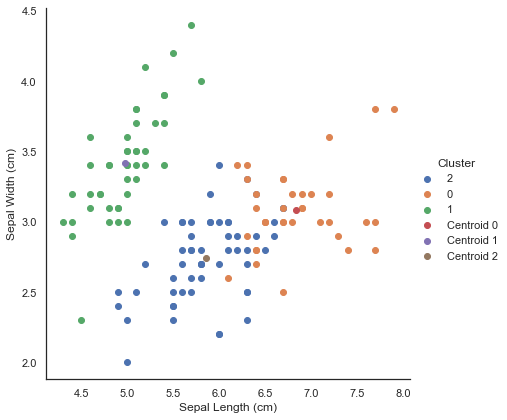

In [94]:
# Visualisasi Hasil Prediksi
sns.set(style="white", color_codes=True)
sns.FacetGrid(dataFrame, hue="Cluster", size=6).map(plt.scatter, 'Sepal Length (cm)', 'Sepal Width (cm)').add_legend()